In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
import pandas as pd
from random import seed
from random import randrange
from math import sqrt

# Load Data, EDA
**Write functions to perform the following tasks and write your observations on the results**


##1. Load Data
Task: Load wages_text.txt file into a data frame called wages_df, display the data and the meta data (description of all columns)

In [65]:
def load_data(filepath):
  print('***Data Frame Created***\n')
  df = pd.read_csv(filepath, sep= ',', header=0)
  print('***Data Description***\n')
  print(df.info())
  print('***Data Frame***')
  print(df)
  return df

filepath = '/content/drive/MyDrive/wages_text.txt'
wages_df = load_data(filepath)

***Data Frame Created***

***Data Description***

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   earn    1379 non-null   float64
 1   height  1379 non-null   float64
 2   sex     1379 non-null   object 
 3   race    1379 non-null   object 
 4   ed      1379 non-null   int64  
 5   age     1379 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 64.8+ KB
None
***Data Frame***
              earn  height     sex   race  ed  age
0     79571.299011   73.89    male  white  16   49
1     96396.988643   66.23  female  white  16   62
2     48710.666947   63.77  female  white  16   33
3     80478.096153   63.22  female  other  16   95
4     82089.345498   63.08  female  white  17   43
...            ...     ...     ...    ...  ..  ...
1374  30173.380363   71.68    male  white  12   33
1375  24853.519514   61.31  female  white  18   86
1376

Observation: There are no null values, earning can be renamed and rounded to two decimal points

##2. Preprocessing 1
Task: Rename columns earn to earning, ed to education, and round float values to two decimal points

In [66]:
def preprocess(df):
 df.round(2)
 df = df.rename({'earn': 'earning', 'ed': 'education'}, axis=1, inplace=True)
 return(df)

wage_df = preprocess(wages_df)
print(wages_df)


           earning  height     sex   race  education  age
0     79571.299011   73.89    male  white         16   49
1     96396.988643   66.23  female  white         16   62
2     48710.666947   63.77  female  white         16   33
3     80478.096153   63.22  female  other         16   95
4     82089.345498   63.08  female  white         17   43
...            ...     ...     ...    ...        ...  ...
1374  30173.380363   71.68    male  white         12   33
1375  24853.519514   61.31  female  white         18   86
1376  13710.671312   63.64  female  white         12   37
1377  95426.014410   71.65    male  white         12   54
1378   9575.461857   68.22    male  white         12   31

[1379 rows x 6 columns]


##3. EDA
Task: Display unique values of categorical features

In [67]:
# from pandas.core.groupby import categorical
def eda(df):
 print('Categorical features are:')
 categorical = df.select_dtypes(include=['object'])
 for col in categorical:
  print(col)
 for col in categorical:
  print('number of unique values in ',col,' = ',df[col].nunique())
  print(df[col].unique())

eda(wages_df)

Categorical features are:
sex
race
number of unique values in  sex  =  2
['male' 'female']
number of unique values in  race  =  4
['white' 'other' 'hispanic' 'black']


##4. Bivariate Analysis
Task: 
1. Find correlation between all pairs of columns as a heatmap
Import required libraries:   
import matplotlib.pyplot as plt
import seaborn as sns

2. Display the plot showing dependency of all pairs of columns and the distribution of the columns

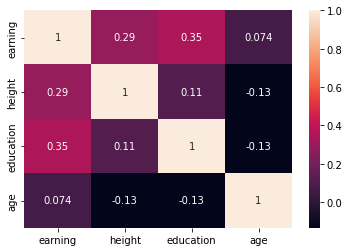

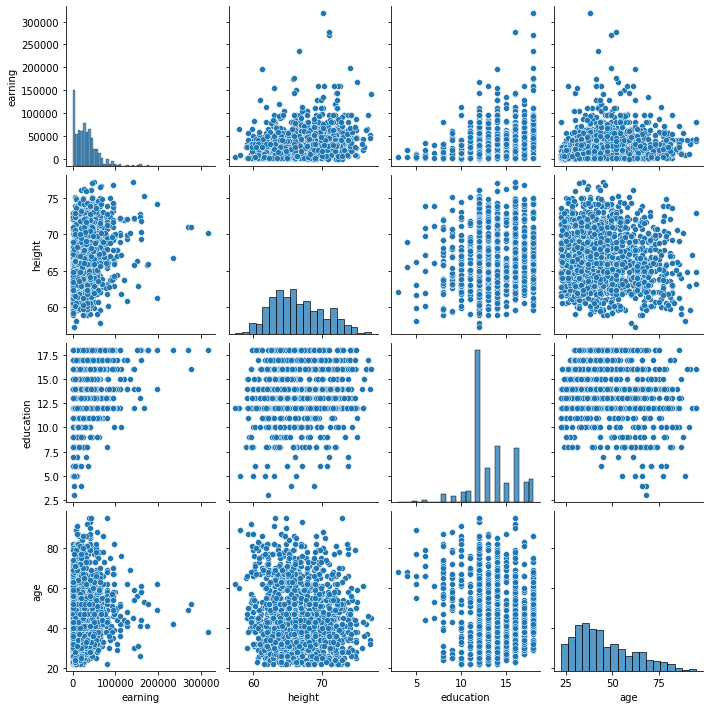

In [68]:
def bivariate_analysis(df):
  import matplotlib.pyplot as plt
  import seaborn as sns

  sns.heatmap(df.corr(), annot = True, fmt='.2g')
  sns.pairplot(df)

bivariate_analysis(wages_df)

##5. Individual scatterplots for bivariate analysis - seaborn

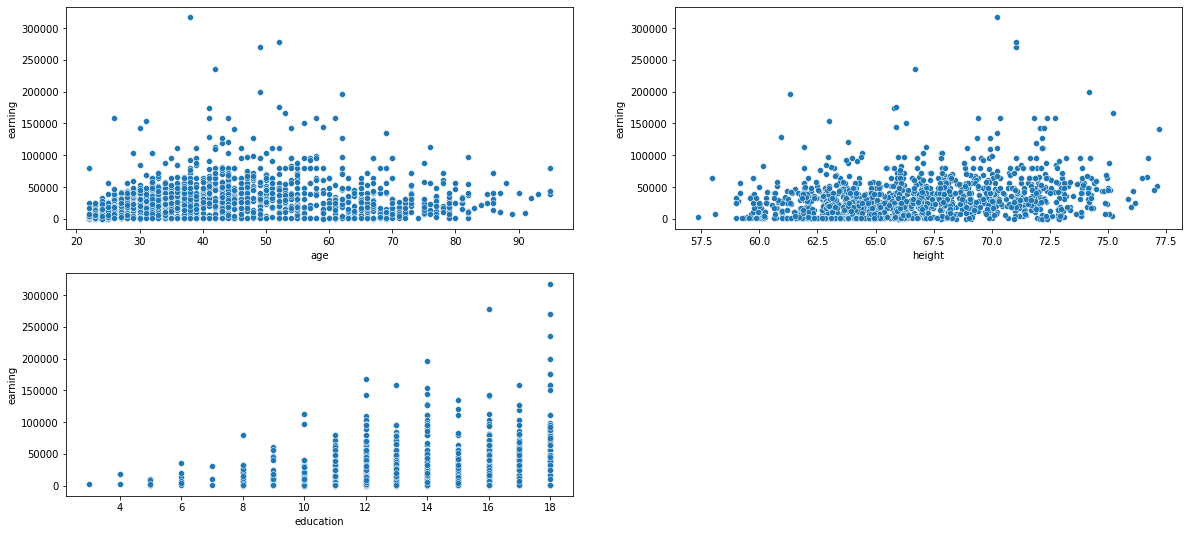

In [69]:
def scatterplot_numeric_data(df):
  import seaborn as sns
  import matplotlib.pyplot as plt

  plt.figure(figsize=(20,9))

  plt.subplot(2,2,1)
  sns.scatterplot(x=df['age'], y=df['earning'])

  plt.subplot(2,2,2)
  sns.scatterplot(x=df['height'], y=df['earning'])

  plt.subplot(2,2,3)
  sns.scatterplot(x=df['education'], y=df['earning'])


scatterplot_numeric_data(wages_df)
  

Observation: 
1. Earning follows normal distribution with some outliers
2. Earning increases with education

## 6. Barplot 

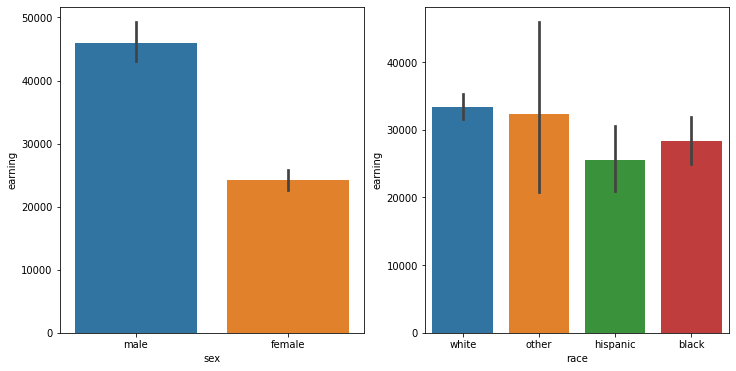

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(x=wages_df['sex'], y=wages_df['earning'])

plt.subplot(1,2,2)
sns.barplot(x=wages_df['race'], y=wages_df['earning'])


Observation:
1. earning varies much with respect to gender
2. earning doesnot varies much with respect to race

# Modeling

# Lab: Simple Linear Regression


* Simple Linear Regression Equation :
* y = c + mX
* In this example:
 * earning  = c + m * education


## Create X and y

In [ ]:
def split_XY(df):
  X = df.education
  Y = df.earning
  return X,Y
  
X,y = split_XY(wages_df)
print(X, y)

0       16
1       16
2       16
3       16
4       17
        ..
1374    12
1375    18
1376    12
1377    12
1378    12
Name: education, Length: 1379, dtype: int64 0       79571.30
1       96396.99
2       48710.67
3       80478.10
4       82089.35
          ...   
1374    30173.38
1375    24853.52
1376    13710.67
1377    95426.01
1378     9575.46
Name: earning, Length: 1379, dtype: float64


In [ ]:
# Split data as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)
print("***Training: \n" , X_train, '\n', y_train)
print("\n***Testing: \n", X_test, '\n',y_test)

***Training: 
 1257    17
1097    10
536     14
54      10
537     12
        ..
802     12
53      12
350     14
79      13
792     13
Name: education, Length: 1103, dtype: int64 
 1257    23908.08
1097    21681.93
536      5781.37
54       5529.47
537     21666.02
          ...   
802     22329.16
53      32803.44
350     55621.94
79      13729.67
792       993.16
Name: earning, Length: 1103, dtype: float64

***Testing: 
 258     16
30      16
631     14
588     12
1064    12
        ..
646     12
267     11
137     16
767     12
91      13
Name: education, Length: 276, dtype: int64 
 258      72549.36
30       43938.86
631      34957.12
588      20882.68
1064     16896.31
          ...    
646     166981.03
267        998.68
137      79481.94
767      24837.30
91       20099.92
Name: earning, Length: 276, dtype: float64


In [ ]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const       -28504.915081
education     4539.988293
dtype: float64

In [ ]:

# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                earning   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     157.2
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           8.25e-34
Time:                        17:15:21   Log-Likelihood:                -12902.
No. Observations:                1103   AIC:                         2.581e+04
Df Residuals:                    1101   BIC:                         2.582e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.85e+04   4910.546     -5.805      0.000   -3.81e+04   -1.89e+04
education   4539.9883    362.068     12.539      0.000    3829.567    5250.410
==============================================================================
Omnibus:                      671.828   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9830.364
Skew:                           2.540   Prob(JB):                         0.00
Kurtosis:                      16.714   Cond. No.                         76.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*End*